In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('c://Users/Admin/Downloads/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [12]:
wrangled = df[df['StratificationID1'] == 'OVERALL'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
question = wrangled[wrangled['Question'] == 'Percent of adults who engage in no leisure-time physical activity'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
x_all = question[question['YearStart'] == 2014][['LocationDesc','Data_Value' ]]
x = question[question['YearStart'] == 2014][['Data_Value' ]].values
x

array([[27.6],
       [19.2],
       [21.2],
       [30.7],
       [21.7],
       [16.4],
       [20.6],
       [24.9],
       [20.8],
       [23.7],
       [23.6],
       [27.7],
       [19.6],
       [18.7],
       [23.9],
       [26.1],
       [22.6],
       [23.8],
       [28.2],
       [29.5],
       [19.7],
       [21.4],
       [20.1],
       [25.5],
       [20.2],
       [31.6],
       [25. ],
       [19.6],
       [23.7],
       [21.3],
       [22.5],
       [19.3],
       [23.3],
       [23.3],
       [25.9],
       [23.2],
       [21.3],
       [25. ],
       [28.3],
       [16.5],
       [23.3],
       [40.6],
       [22.5],
       [25.3],
       [21.2],
       [26.8],
       [27.6],
       [16.8],
       [19. ],
       [23.5],
       [18.1],
       [28.7],
       [21.2],
       [22.1]])

In [15]:
wrangled = df[df['StratificationID1'] == 'OVERALL'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
year = wrangled[wrangled['Question'] == 'Percent of adults aged 18 years and older who have obesity'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
y_all = year[year['YearStart'] == 2014][['LocationDesc','Data_Value' ]]
y = year[year['YearStart'] == 2014][['Data_Value' ]].values
y

array([[33.5],
       [29.7],
       [28.9],
       [35.9],
       [24.7],
       [21.3],
       [26.3],
       [30.7],
       [21.7],
       [26.2],
       [30.5],
       [28. ],
       [22.1],
       [28.9],
       [29.3],
       [32.7],
       [30.9],
       [31.3],
       [31.6],
       [34.9],
       [28.2],
       [29.6],
       [23.3],
       [30.7],
       [27.6],
       [35.5],
       [30.2],
       [26.4],
       [28.9],
       [30.2],
       [27.7],
       [27.4],
       [26.9],
       [28.4],
       [27. ],
       [29.7],
       [32.2],
       [32.6],
       [33. ],
       [27.9],
       [30.2],
       [28.3],
       [27. ],
       [32.1],
       [29.8],
       [31.2],
       [31.9],
       [25.7],
       [24.8],
       [28.5],
       [27.3],
       [35.7],
       [31.2],
       [29.5]])

In [16]:
x = x.reshape(-1, 1)
x

array([[27.6],
       [19.2],
       [21.2],
       [30.7],
       [21.7],
       [16.4],
       [20.6],
       [24.9],
       [20.8],
       [23.7],
       [23.6],
       [27.7],
       [19.6],
       [18.7],
       [23.9],
       [26.1],
       [22.6],
       [23.8],
       [28.2],
       [29.5],
       [19.7],
       [21.4],
       [20.1],
       [25.5],
       [20.2],
       [31.6],
       [25. ],
       [19.6],
       [23.7],
       [21.3],
       [22.5],
       [19.3],
       [23.3],
       [23.3],
       [25.9],
       [23.2],
       [21.3],
       [25. ],
       [28.3],
       [16.5],
       [23.3],
       [40.6],
       [22.5],
       [25.3],
       [21.2],
       [26.8],
       [27.6],
       [16.8],
       [19. ],
       [23.5],
       [18.1],
       [28.7],
       [21.2],
       [22.1]])

In [17]:
y = y.reshape(-1, 1)
y

array([[33.5],
       [29.7],
       [28.9],
       [35.9],
       [24.7],
       [21.3],
       [26.3],
       [30.7],
       [21.7],
       [26.2],
       [30.5],
       [28. ],
       [22.1],
       [28.9],
       [29.3],
       [32.7],
       [30.9],
       [31.3],
       [31.6],
       [34.9],
       [28.2],
       [29.6],
       [23.3],
       [30.7],
       [27.6],
       [35.5],
       [30.2],
       [26.4],
       [28.9],
       [30.2],
       [27.7],
       [27.4],
       [26.9],
       [28.4],
       [27. ],
       [29.7],
       [32.2],
       [32.6],
       [33. ],
       [27.9],
       [30.2],
       [28.3],
       [27. ],
       [32.1],
       [29.8],
       [31.2],
       [31.9],
       [25.7],
       [24.8],
       [28.5],
       [27.3],
       [35.7],
       [31.2],
       [29.5]])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8, test_size=.2, random_state=100)

In [21]:
print(f'X Train Data shape{x_train.shape}')
print(f'y Train Data shape{y_train.shape}')
print(f'X Test Data shape{x_test.shape}')
print(f'y Test Data shape{y_test.shape}')


X Train Data shape(43, 1)
y Train Data shape(43, 1)
X Test Data shape(11, 1)
y Test Data shape(11, 1)


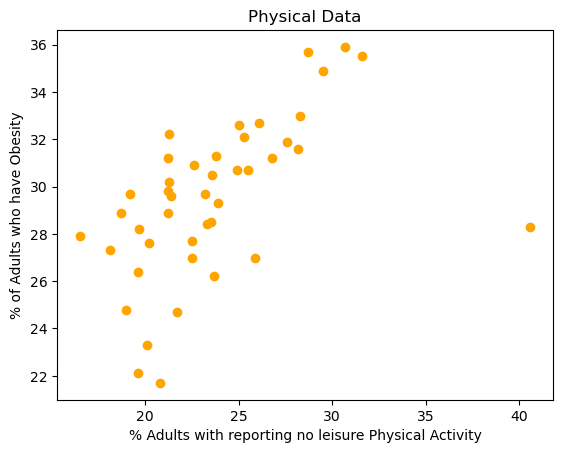

In [22]:
plt.scatter(x_train, y_train, color='orange')
plt.xlabel('% Adults with reporting no leisure Physical Activity')
plt.ylabel('% of Adults who have Obesity')
plt.title('Physical Data')
plt.show()

In [24]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

In [25]:
print(f'Train Accuracy {round(lm.score(x_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test)* 100,2)}%')

Train Accuracy 29.76%
Test Accuracy 44.09%


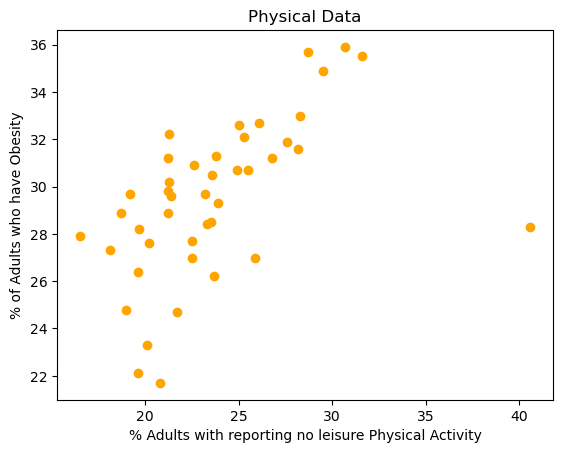

In [26]:
plt.scatter(x_train, y_train, color='orange')
plt.xlabel('% Adults with reporting no leisure Physical Activity')
plt.ylabel('% of Adults who have Obesity')
plt.title('Physical Data')
plt.show()